# MULTILINGUAL STATISTICAL TERMINOLOGY DATASET
___
### About Notebook
In this notebook we will do analysis of languages mostly it will be visuals/graphs.   

___
### Load Packages 
Lets load packages that we need to achieve the goal above

In [1]:
import os
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from io import StringIO
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pd.options.display.max_colwidth = 100

### Load Data 
___
Lets load data from csv

In [2]:
df = pd.read_csv('../data/csv/Multilingual_Statistical_-terminology_2013.csv')

### Partial View of data 
___
Lets check how data looks

In [3]:
df.head()

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
0,Landbou-insette,Agriculture,"Consumable expendable inputs in agricultural production for both crops and livestock, for exampl...",Agricultural inputs,Iinsetjenziswa zokulima,Amagalelo ezolimo,Izinsizamikhiqizo zezolimo,Dithušatšweletšo temong,Dintlafatsi tsa temothuo,Dithusa-tlhagiso tsa temothuo,Tisetjentiswa tetekulima,Thikhedzo dza zwa vhulimivhufuwi,Swinonisi
1,Jaargewasse,Agriculture,Crops that are planted and harvested during the same production season.,Annual crops,Isivuno somnyaka,Izilimo zonyaka,izitshalo zonyaka,Dibjalo tša ngwaga,Dijalo tsa selemo tsa hang ka selemo,Dijwalo tsa ngwaga,Sivuno semnyaka,Zwikaṋwa zwa ṅwaha,Swimilanguva
2,Oppervlakte geoes vir graan,Agriculture,"Area harvested for dry grain (whole grain, seed, beans or unshelled nuts) for commercial purpose...",Area harvested for grain,isikhekhe esivunelwe ukudla,Ummandla ovunwe isivuno esiziinkozo,Insimu okuvunwe kuyo okusanhlamvu,Palomoka ya tema ya puno ya leroro,Masimo a kotulo ya dijothollo,Kgaolokotutsweng tlhaka/thoro,Indzawo levunelwe lokusaluhlavu,Tsimu / vhupo khaṋelwathoro,Ndhawu ya ntshovelo wa rimbewundzhoho
3,Oppervlakte beplant vir graan,Agriculture,That part of the total area planted that is planted with the intention of harvesting it for grai...,Area planted for grain,isikhekhe esitjalelwe ukudla,Ummandla otyalwe ukutya okuziinkozo,Insimu etshalwe okusanhlamvu,Tema ye e lemetšwego leroro/tema ye e lemetšwego dijothoro,Masimo a temo ya dijothollo,Kgaolo e jwetsweng tlhaka/thoro; kgaolojwetsweng,Indzawo lehlanyelelwe lokusaluhlavu,Tsimu /vhupo ndimelwathoro / ngobelelwathoro,Ndhawu yo byala rimbewundzoho
4,Kontantgewas,Agriculture,Crop grown for sale rather than for consumption on the farm. Synonym is food crop.,Cash crop,Ukudla kokuthengisa,Isilimo esinengeniso,Izitshalo ezizothengiswa,Dibjalo tša go rekišwa,Dijalo tse rekiswang,Dijwalothekiso,Silimo sekutsengiswa,Tshizwalwa / tshimela ndimelwathengiso,Xirimiwanxaviso


####  Categories
From previous exercise we know our data had 32 categories **(they were called chapters in the pdf)**

In [4]:
### Lets display number of categories, we will start by removing leading spaces
#print("Number of Categories: ", len(df.Category.str.strip().unique()))
print("Number of Categories: ", len(df.Category.unique()))

Number of Categories:  32


In [5]:
### Lets remove and clean up leading spaces and spaces after text
df.Category = df.Category.str.strip()

#### Visualize Categories
___
Visual presentation helps in analyzing data, pictures are better than looking at long texts and numbers

In [6]:
import seaborn as sns
from textwrap import wrap
def horizontal_bar_chart(df, x, y, label, figsize=(16, 16)):
    """
    This customize horizontal bar chart from seaborn(sns as aliased above) 
    Args:
        df: dataframe 
        x: x-axis column 
        y: y-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=df,
            label=label, color="b", palette=["#00008b"])
    total = df.values[:, 1].sum()
    for i, v in enumerate(df.values[:, 1]):
        ax.text(v + 3, i + .25, str(format(v / total * 100, '.2f')) + '% (' + str(v) + ')')
        
    labels = [ '\n'.join(wrap(l, 20)) for l in df.values[:, 0]]
    ax.set_yticklabels(labels)
    x_value=['{:,.0f}'.format(x/total * 100) + '%' for x in ax.get_xticks()]
    plt.xticks(list(plt.xticks()[0]) + [10])
    ax.set_xticklabels(x_value)
    plt.ylabel('')
    plt.xlabel('')
    sns.despine(left=True, bottom=True)

### Word cloud Custom function ####
def plot_wordcloud(df, column, name):
    """ This is custom word cloud that is ready to 
        be used with any picture you would like to use for word cloud
        
        Args:
            df: pandas dataframe 
            column: str -> target column
            name: str -> name of the picture without extension for .png preferebly
        Return:
            None
    """
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    mask = np.array(Image.open(path.join(d, '../images/' + name + ".png")))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=10000, mask=mask,
                   stopwords=stopwords, contour_width=3, contour_color='white')
    wc.generate(' '.join(df[column]))
    plt.figure(figsize=(16, 12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

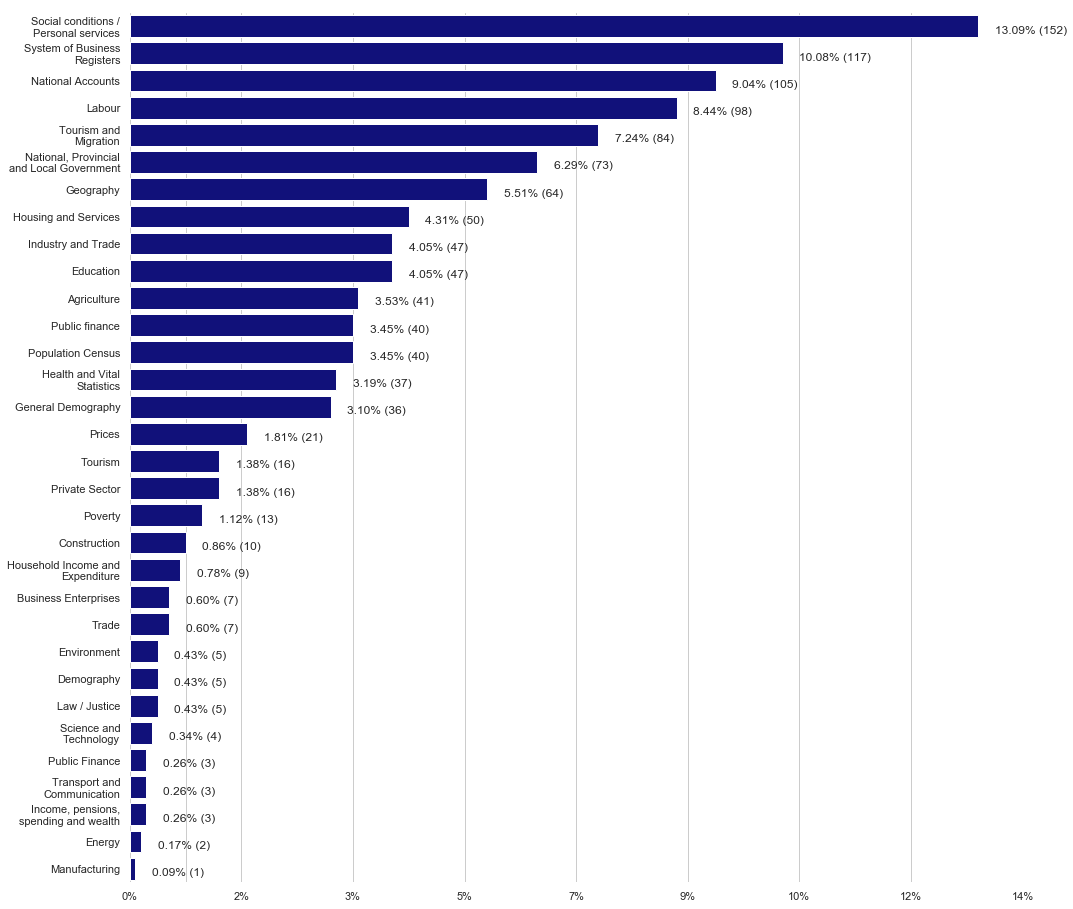

In [7]:
horizontal_bar_chart(pd.DataFrame(df.Category.value_counts(ascending=True)[::-1].reset_index()),
                     'Category', 'index', 'Category')

In [8]:
df[df.Category == 'Social conditions / Personal services'].head()

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
782,Aanneming,Social conditions / Personal services,A legal process which places a child in the care of a parent or parents other than his / her bio...,Adoption,Imbelekelo / Itholomntwana / Ilamukelomntwana,ubuzali obunikwe ngumthetho/ubuzali ukukhulisa umntwana ongamzalanga ngqo\r\n,Ukunikezelwa (isib. komntwana),Atopošene / Botswadikgodiši,Adopshene,Botsadikatsholo / Botsadikakgodiso,Kufaka esiswini,Vhuunḓi,Nhlayiso
783,Breedgebaseerde benadering,Social conditions / Personal services,An approach whereby all consumer units in the municipality receive free basic services on the cu...,Broad-based approach,Indlela ebanzi yokwethulwa kwezenzelwa zakamasipala / Zakamasipalada / Zakamasipaladi\r\n,inkqubo ephangaleleyo,Indlela yokuxhasa evulelekile,Mokgwa wa kakaretšo,Tshebediso ya mokgwa o batsi,Mokgwatlhokatuelelo,Tinsita tamasipala tamahhala,Nḓilaṱhanḓavhuwi/ Ndila ya u wana tshumelo dza masipala dzi sa badelwi,Endleloangarhelo
784,Emmersanitasiestelsel / Emmerstelsel,Social conditions / Personal services,A toilet system with a pail or other removable receptacle placed directly under the toilet seats...,Bucket sanitation system,Irherho lokuzithumela emathungeni,inkqubo yezindlu zangasese zamabhakethi,Uhlelo lokuthuthwa kwendle ngamabhakede,Tsela ya kelelatšhila ya dipakete,Mabakete/Matlwana a diemere,Thulaganyomatlwanaboithusetso a dikgamelo,Kutfutfwa kwembube / Indle ngemabhakede,Mabunga a mabakete,Nkululoxibakiti
785,Sorgafhanklikheidstoelaag,Social conditions / Personal services,A monthly grant from government to parent / guardian / foster parent of a child with disability ...,Care dependency grant,Isibonelelo sokutjheja / Sokutlhogomela / Sokondla umntwana,isibonelelo-mali sokukhathalela umntwana obandezeleke ngokwamalungu omzimba\r\n,Isibonelelomali sokubhekelela / Uxhasomali lokubhekelela,Mphiwafela / Motlaodutše wa tlhokomelo ya bana bao ba nago le bogolofadi,Neelo/nehelo/ditsiane/krante ya tlhokomelo,Thusotlole ikaegotlhokomelo / Kabelotlole ikaegotlhokomelo,Sibonelelo salabadzinga lusitonchanti / Sibonelelo selusitonchati / Sabelo sahulumende kubantfu ...,Gavhelo ḽa vhuunḓi / Mphomali ya vhuunḓi,Malimpfuneto ya nhlayiso
786,Kinderonderhoudstoelaag / Kinderondersteuningstoelaag / Kindersteuntoelaag / Kindertoelaag\r\n,Social conditions / Personal services,"Government grant received on behalf of a child of a specific age as determined by legislation, i...",Child support grant,Isondlo sabantwana,isibonelelo-mali sabantwana,Uxhasomali lwezingane / Isibonelelomali sezingane,Mphiwafela / Motlaodutše wa phepo ya ngwana,Neelo/nehelo/ditsiane/krante ya tshehetso ya ngwana,Thusotlole ya ngwana / Kabelotlole ya ngwana,Sabelo / Sibonelelo sesondlo sebantfwana,Gavhelo ḽa vhana,Malimpfuneto ya nhlayiso wa vana


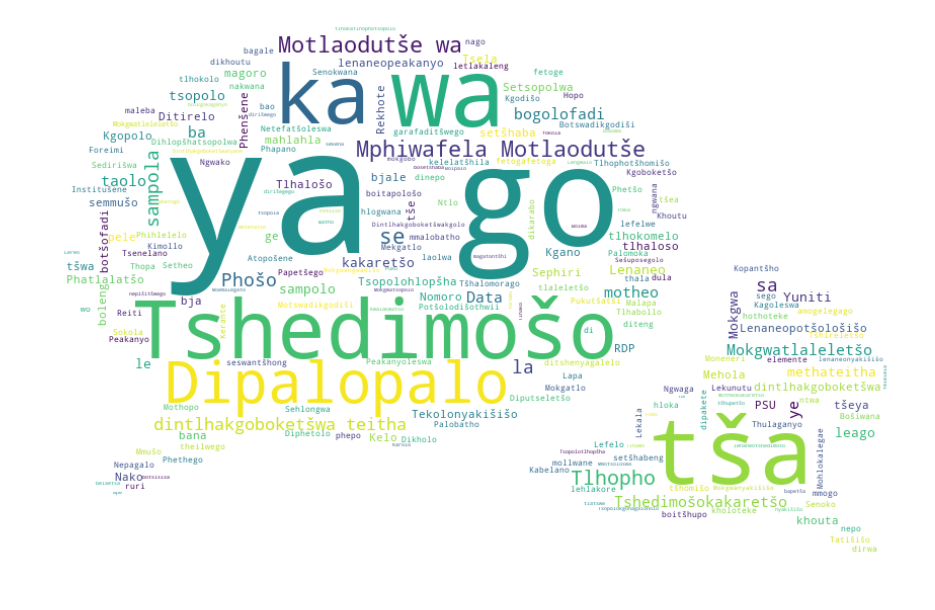

In [9]:
df.Sepedi = df.Sepedi.astype(str)
plot_wordcloud(df[df.Category == 'Social conditions / Personal services'], 'Sepedi', 'Comment')

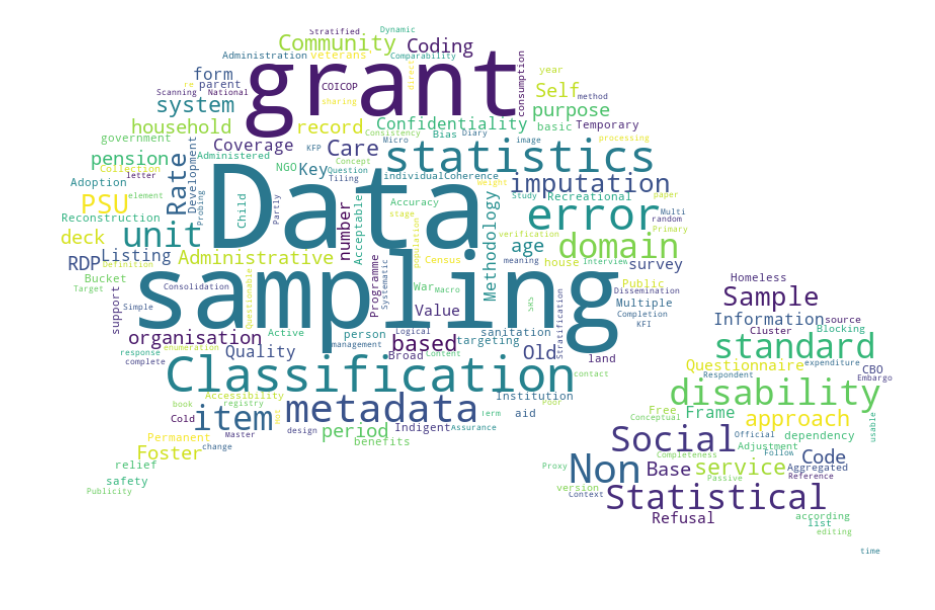

In [10]:
plot_wordcloud(df[df.Category == 'Social conditions / Personal services'], 'English_Term', 'Comment')

## Classification 
___
Lets start with simple classification and see what kind of results we will get

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, auc, confusion_matrix
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [12]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Sepedi)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, df.Category, test_size=0.20)

In [14]:
vectorizer.get_feature_names()[:30]

['09',
 '2000',
 'aba',
 'abege',
 'aga',
 'agiwago',
 'akaretšwe',
 'akhaonte',
 'amana',
 'ammalobatho',
 'amogelega',
 'amogelegago',
 'amogelwego',
 'amogetšwego',
 'antherophometheriki',
 'ao',
 'apea',
 'aterese',
 'ateresetlaleletšo',
 'atlegago',
 'atlegilego',
 'atopošene',
 'ba',
 'babelegi',
 'badiriši',
 'badudi',
 'baeng',
 'baerase',
 'baeti',
 'bagale']

### Training and comparing
___
Train and compare two classifiers, we will start by fitting the two classifier namely `LogisticRegression` and `RandomForestClassifier` and compare the results before we do proper translation in the next coming notebook

In [15]:
clf_lg = LogisticRegression().fit(X_train, y_train)
clf_rf = RandomForestClassifier().fit(X_train, y_train)

#### Making predictions 

In [16]:
lg_y_pred = clf_lg.predict(X_val)
rf_y_pred = clf_rf.predict(X_val)

In [17]:
print('Logistic Regresion Report', accuracy_score(y_val, lg_y_pred))
print('Random Forest Report', accuracy_score(y_val, rf_y_pred))

Logistic Regresion Report 0.49356223175965663
Random Forest Report 0.4678111587982833


In [18]:
import warnings
warnings.filterwarnings('ignore')
print('Linear Regression')
print(classification_report(y_val, lg_y_pred))

Linear Regression
                                           precision    recall  f1-score   support

                              Agriculture       1.00      0.50      0.67         8
                             Construction       0.00      0.00      0.00         4
                               Demography       0.00      0.00      0.00         1
                                Education       1.00      0.50      0.67        10
                                   Energy       0.00      0.00      0.00         1
                       General Demography       0.00      0.00      0.00         4
                                Geography       0.44      0.24      0.31        17
              Health and Vital Statistics       1.00      0.40      0.57         5
         Household Income and Expenditure       0.00      0.00      0.00         0
                     Housing and Services       0.50      0.42      0.45        12
                       Industry and Trade       0.00      0.00      

In [19]:
print('Random Forest')
print(classification_report(y_val, rf_y_pred))

Random Forest
                                           precision    recall  f1-score   support

                              Agriculture       1.00      0.50      0.67         8
                             Construction       0.00      0.00      0.00         4
                               Demography       0.00      0.00      0.00         1
                                Education       1.00      0.50      0.67        10
                                   Energy       0.00      0.00      0.00         1
                       General Demography       0.00      0.00      0.00         4
                                Geography       0.50      0.12      0.19        17
              Health and Vital Statistics       0.67      0.40      0.50         5
         Household Income and Expenditure       0.00      0.00      0.00         0
                     Housing and Services       0.33      0.25      0.29        12
                       Industry and Trade       0.00      0.00      0.00

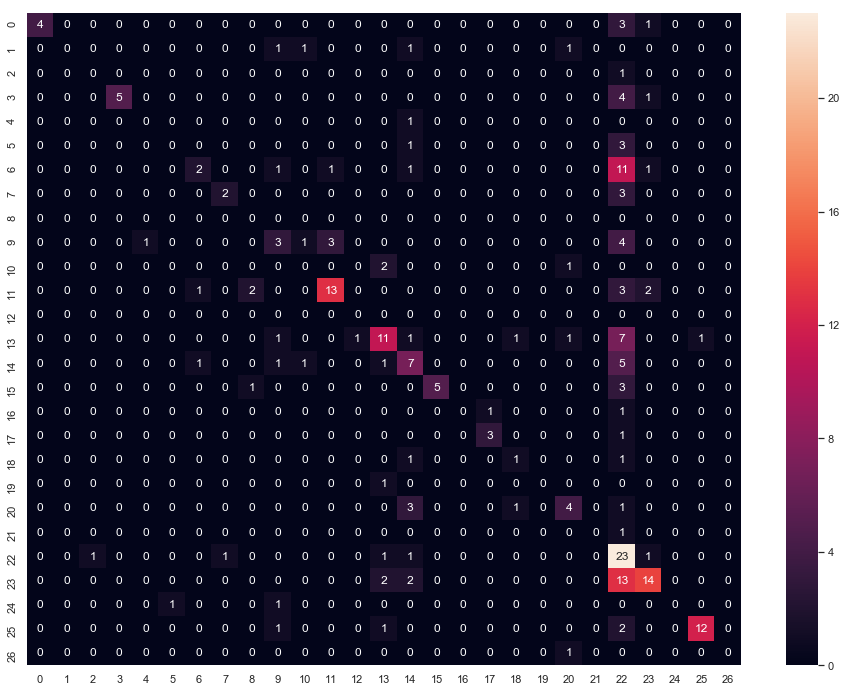

In [20]:
df_cm = pd.DataFrame(confusion_matrix(y_val, rf_y_pred))
plt.figure(figsize = (16,12))
sns.heatmap(df_cm, annot=True)

### This is just, a start go ahead and do more, stay tuned for the next translation notebook 